## **Implementing K-Means clustering algorithm**

In [1]:
# necessary libraries and modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Loading the dataset

data = pd.read_csv('Datasets\penguins.csv')
data.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
print(f'Dataframe shape : {data.shape[0]} x {data.shape[1]}   (rows x cols)')

Dataframe shape : 344 x 5   (rows x cols)


In [4]:
print('Dataset features info : \n')       # 2 null(missing) values (dtype: float64) in each column
data.info()

Dataset features info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


## *Exploratory Data Analysis (EDA)* 

In [5]:
print('Statistical Analysis of data : \n')
data.describe().T

Statistical Analysis of data : 



,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [6]:
# Dropping the null values 
data.dropna(inplace = True)
print('Number of missing values for each feature : \n')
data.isnull().sum()

Number of missing values for each feature : 



culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

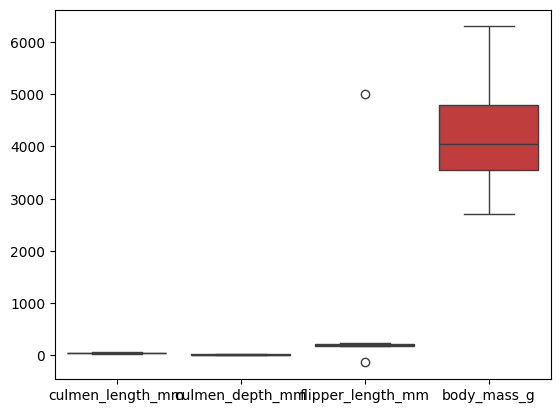

In [7]:
# Checking for outliers
sns.boxplot(data = data)

In [21]:
print(f'Flipper Length outlier : {sum(data["flipper_length_mm"] > 4000)}')

Flipper Length outlier : 1


In [24]:
# Filtering out rows with incorrect data / placeholder values 
data = data.loc[data['sex'].isin(['MALE', 'FEMALE'])]

data = data[(data['flipper_length_mm'].between(0, 4000))]

data.reset_index(drop = True, inplace = True)

data.describe().T 

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,332.0,44.021084,5.452462,32.1,39.5,44.7,48.625,59.6
culmen_depth_mm,332.0,17.153012,1.960275,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,332.0,200.975904,14.035971,172.0,190.0,197.0,213.000,231.0
body_mass_g,332.0,4206.475904,806.361278,2700.0,3550.0,4025.0,4781.250,6300.0


## *Encoding categorical data*

In [25]:
data = pd.get_dummies(data, drop_first = True)
data.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True
5,38.9,17.8,181.0,3625.0,False
6,39.2,19.6,195.0,4675.0,True
7,41.1,17.6,182.0,3200.0,False
8,38.6,21.2,191.0,3800.0,True
9,36.6,17.8,185.0,3700.0,False


## *Feature Scaling (for enhacing stability and equal contribution)*

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = sc.fit_transform(data)

data_scaled = pd.DataFrame(data = scaled, columns = data.columns)
data_scaled.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


## *PCA for dimensionality reduction (relevant features)*

In [28]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = None)
data_pca = pca.fit(data_scaled)

data_pca.explained_variance_ratio_

array([0.56820593, 0.28153159, 0.09633697, 0.03399271, 0.01993278])

In [34]:
print('Thus, the features that are responsible for majority of variance in data are : ')
print(f'Culmen Length : {data_pca.explained_variance_ratio_[0] * 100:.2f} %')
print(f'Culmen Depth : {data_pca.explained_variance_ratio_[1] * 100:.2f} %')

Thus, the features that are responsible for majority of variance in data are : 
Culmen Length : 56.82 %
Culmen Depth : 28.15 %


In [35]:
# This suggests that reducing the dataset to 2 dimensions (Culmen length & Culmen depth) would retain 
# a significant amount of original information, making it a good candidate for further analysis  

In [36]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

## *K-Means Clustering*

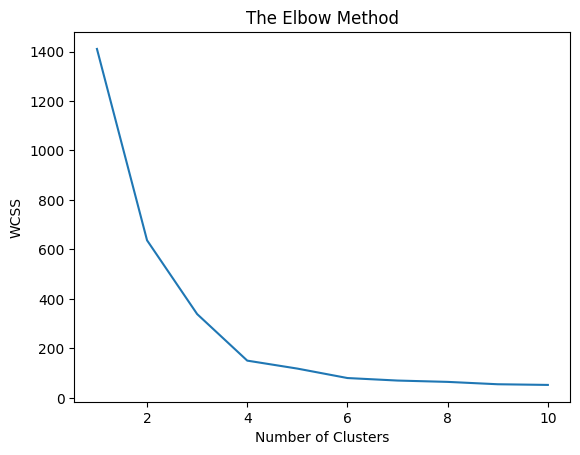

In [37]:
from sklearn.cluster import KMeans 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)             # gives the wcss(within cluster sum of squares value)

# you will see that as WCSS reduces, the Number of Clusters increases 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(data_pca)

## *Visualizing the Clusters*

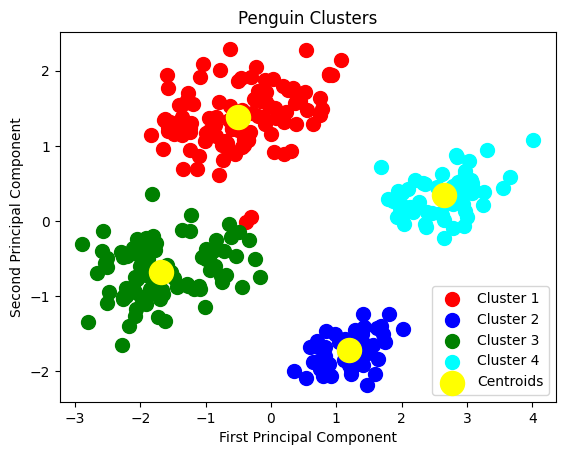

In [39]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Penguin Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

## *Hierarchical Clustering*

### *Wards Method*

In [40]:
# Starts by treating each data point as an individual cluster, and it differs in making decisions in 
# order to merge 2 clusters. It basically aims for minimizing the total within-cluster variance
# At each step, it merges 2 clusters that result in the smallest increase in the 
# sum of squared deviations from mean.

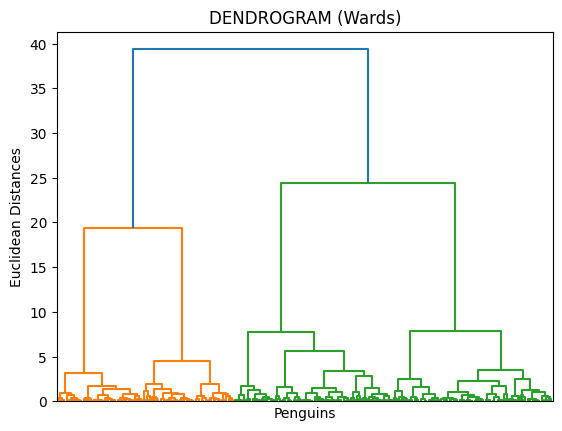

In [48]:
import scipy.cluster.hierarchy as sch 

# Visualizing a dendrogram
dendrogram  = sch.dendrogram(sch.linkage(data_pca, method = 'ward'), no_labels = True)
plt.title('DENDROGRAM (Wards)')
plt.xlabel('Penguins')
plt.ylabel('Euclidean Distances')
plt.show()

### *Average Linkage Method*

In [45]:
# Starts with each data point as an individual cluster. It then finds and merges the pair of clusters
# which are the closest to each other. "Closeness" refers to the average distance between all 
# pairs of data points in both clusters. It merges the clusters with the smallest average 
# pairwise distance.

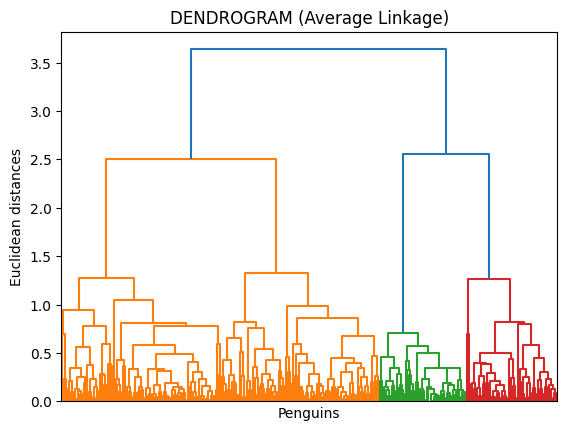

In [49]:
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'average'), no_labels = True)
plt.title('DENDROGRAM (Average Linkage)')
plt.xlabel('Penguins')
plt.ylabel('Euclidean distances')
plt.show()

In [52]:
# Training thr Hierarchical Clustering model on the dataset 
from sklearn.cluster import AgglomerativeClustering 

# as you can see from dendrograms above, 4 clusters --> 4 colors 
hc = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

y_hc = hc.fit_predict(data_pca)

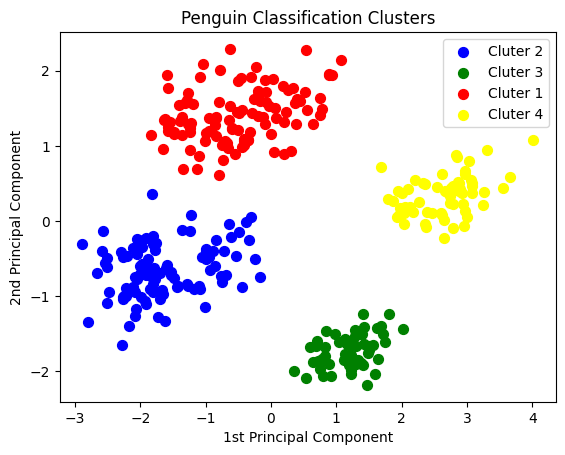

In [55]:
# Cluster Visualization
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluter 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluter 3')
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluter 1')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 50, c = 'yellow', label = 'Cluter 4')

plt.title('Penguin Classification Clusters')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.legend()
plt.show()